In [1]:
!wget https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv

--2020-12-28 19:08:55--  https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/18vhxydhoe3g84n/creditcard%202.csv [following]
--2020-12-28 19:08:55--  https://www.dropbox.com/s/raw/18vhxydhoe3g84n/creditcard%202.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9bf2d886e459001cac9b446bed.dl.dropboxusercontent.com/cd/0/inline/BF85wJOe6Wck0putvUKJshrgtKAJHUqTTAzoTSGSTH4YPRDi7rmyHn7XsTWD8obs029iI0B01YuWYm19XXzp4lVn0IdXVVH3cagNOS3b-uyceaURIrMPSOfpuvfqOt9jI8o/file# [following]
--2020-12-28 19:08:56--  https://uc9bf2d886e459001cac9b446bed.dl.dropboxusercontent.com/cd/0/inline/BF85wJOe6Wck0putvUKJshrgtKAJHUqTTAzoTSGSTH4YPRDi7rmyHn7XsTWD8obs029iI0B01YuWYm19XXzp4lVn0IdXV

In [4]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
import seaborn as sns


In [5]:
df=pd.read_csv("creditcard 2.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

In [8]:
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [9]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))


CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [10]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])


X_train samples :  [[ 5.31500000e+04 -1.11504743e+00  1.03558276e+00  8.00712441e-01
  -1.06039825e+00  3.26211690e-02  8.53422160e-01 -6.14243480e-01
  -3.23116112e+00  1.53994798e+00 -8.16908791e-01 -1.30559201e+00
   1.08177199e-01 -8.59609580e-01 -7.19342108e-02  9.06655628e-01
  -1.72092961e+00  7.97853221e-01 -6.75939779e-03  1.95677806e+00
  -6.44895565e-01  3.02038533e+00 -5.39617976e-01  3.31564886e-02
  -7.74945766e-01  1.05867812e-01 -4.30853482e-01  2.29736936e-01
  -7.05913036e-02  1.29500000e+01]]
X_test samples :  [[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
  -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
  -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
   2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
  -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
   1.86409421e-01 -2.07098267e-01 -4.33890272e-01 -2.61613283e-01
  -4.66506063e-02  2.11512300e-01  8.29721214e-03  1.08494430e-01
   

Text(0.5, 1.0, 'Time Vs Amount')

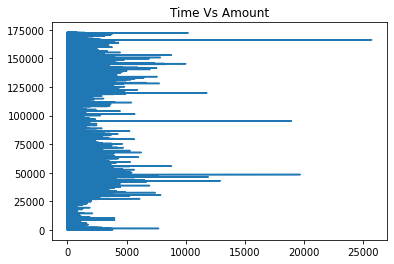

In [11]:
x=df['Amount']
y=df['Time']
plt.plot(x,y)
plt.title('Time Vs Amount')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


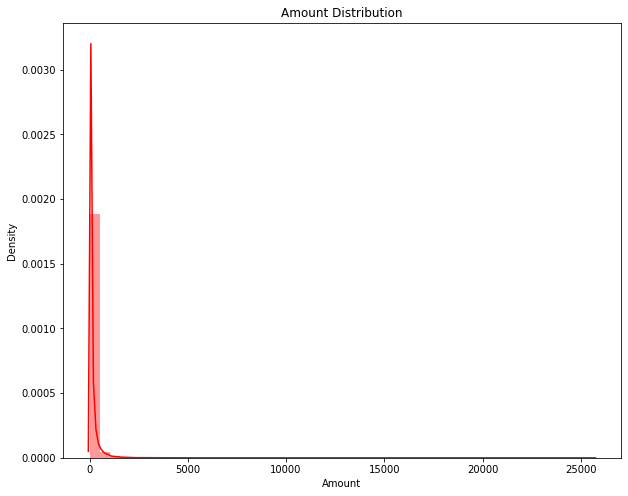

In [12]:
plt.figure(figsize=(10,8),)
plt.title('Amount Distribution')
sns.distplot(df['Amount'],color='red');


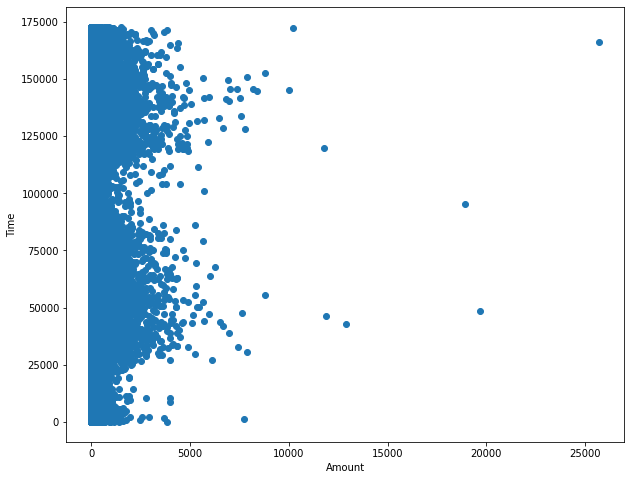

In [13]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(df['Amount'],df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

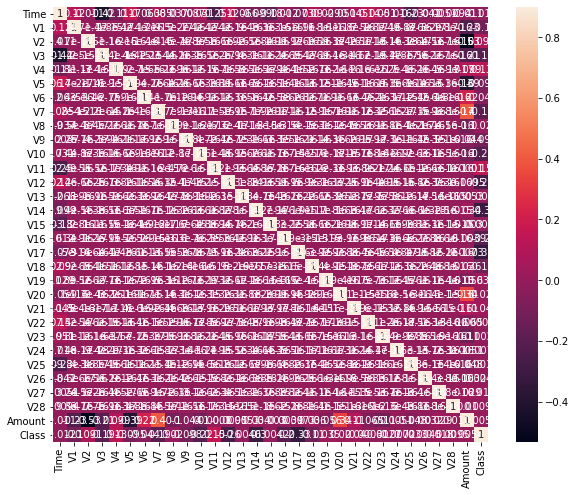

In [14]:
correlation_metrics=df.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(correlation_metrics,vmax=.9,annot=True,square=True)
plt.show()

In [16]:
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [17]:
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [20]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [21]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)


In [22]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9983146659176293
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991046662687406
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9982268881008391
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992977774656788
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994733330992591
------------------------------------------------------------------------


In [23]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.09433962264150944
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7357512953367875
------------------------------------------------------------------------
F1 score of the SVM model is 0.0
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7727272727272727
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8421052631578948
------------------------------------------------------------------------


In [24]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [25]:
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost


In [27]:
plt.rcParams['figure.figsize'] = (6, 6)

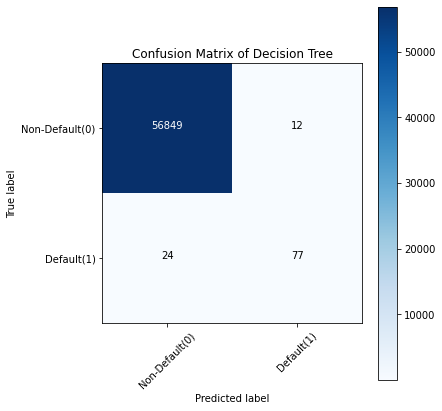

In [28]:
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

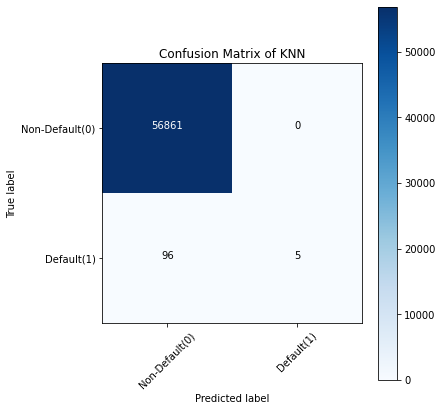

In [29]:
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

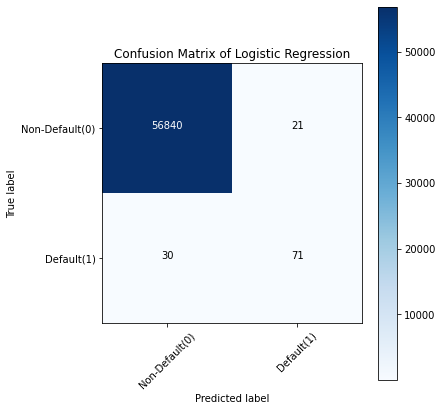

In [30]:
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

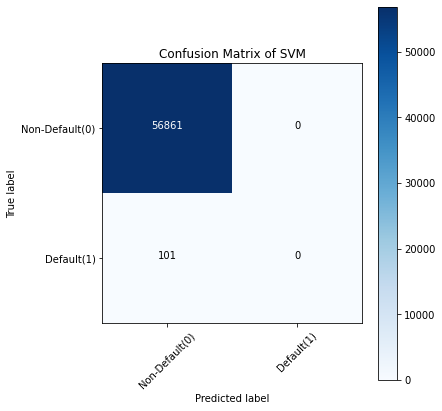

In [31]:
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

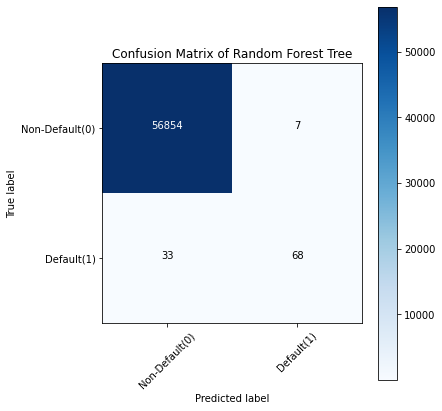

In [32]:
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

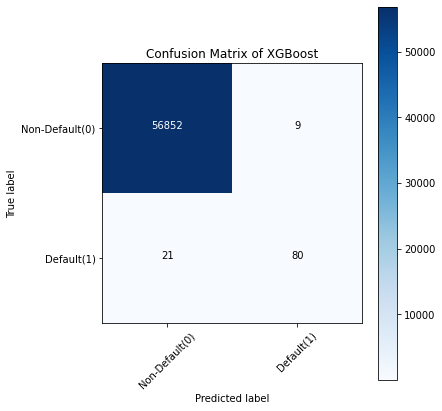

In [33]:
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()